## Instructions
- See deadline on the course web page
- This problem set is performed individually. See examination rules on the course web page.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand and be able to explain his/her submitted solution. Plagiarism is not allowed (submissions will be both manually and automatically monitored).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.
- Note that grading is performed in the teacher's python environment, which is based on the conda `environment.yml` file in the course github repo. Please avoid using additional python modules (such as `plotly`) as this might cause automatic tests to fail.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s). 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [1]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Lozada'  # string
student['Firstname']='Alejandro' # string
student['CID']='lozadaa'        # string
student['DOB-year']=1997         # four-digit integer
student['DOB-month']=4           # integer in the range [1, 12]
student['DOB-day']=17             # integer in the range [1, 31]

student

{'Lastname': 'Lozada',
 'Firstname': 'Alejandro',
 'CID': 'lozadaa',
 'DOB-year': 1997,
 'DOB-month': 4,
 'DOB-day': 17}

In [2]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
1. All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.
2. That discussions with your peers are allowed, also concerning approaches to solve the problem sets, but that direct plagiarism is not allowed and that you must reach your own understanding of submitted solutions according to the definition in the previous point.

In [3]:
student_self_assessment = True


In [4]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 1
## Extra problems
### Learning from data [TIF285], Chalmers, Fall 2022

Last revised: 20-Aug-2022 by Christian Forssén [christian.forssen@chalmers.se]

In [5]:
# import modules

import sys
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import emcee as emcee
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

## Problem 5 (extra)
### (3 points)

#### Reload the third dataset from Problem 3

In [6]:
datafile = 'DataFiles/dataset3.dat'
X, y = np.loadtxt(datafile, unpack=True)
m = len(X)
X = X.reshape(m,1); y = y.reshape(m,1)

#### Validation curves
Create a validation curve for the polynomial model (for different degrees) where you plot the training score and the validation score as a function of the model complexity. 
- The model complexity is simply the degree of the polynomial.
- Make sure to print (e.g. in the axis label) what "score" that is shown (remember that different measures are being used in the literature).
- For the computation of training and validation scores you should use cross-validation which is more stable than the use of a single, random pair of training and validation sets.

Question to ponder:
- From this curve: Which order polynomial do you think was used when generating the data?

*Hint:* `scikit-learn` has a function `validation_curve` that might be useful. It is instructive to implement the calculation of learning curves yourself, but it is not required for this task.

In [7]:
def poli_reg(degree):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression())
        

complexity = [1,2,3,4,5,6,7,8,9,10]
folds = 5
train_matrix = np.zeros((len(complexity),2))
val_matrix = np.zeros((len(complexity),2))

for j in range(len(complexity)):
    
    kfold = cross_validate(poli_reg(degree=complexity[j]),
                       X,
                       y,
                       cv=folds,
                       scoring='neg_mean_squared_error',
                       return_train_score=True)
    
    # train 
    train_median = np.median(kfold['train_score']*-1)
    train_matrix[j,0] = train_median
    
    train_sigma = np.std(kfold['train_score']*-1)
    train_matrix[j,1] = train_sigma
    
    # test 
    val_median = np.median(kfold['test_score']*-1)
    val_matrix[j,0] = val_median
    
    val_sigma = np.std(kfold['test_score']*-1)
    val_matrix[j,1] = val_sigma

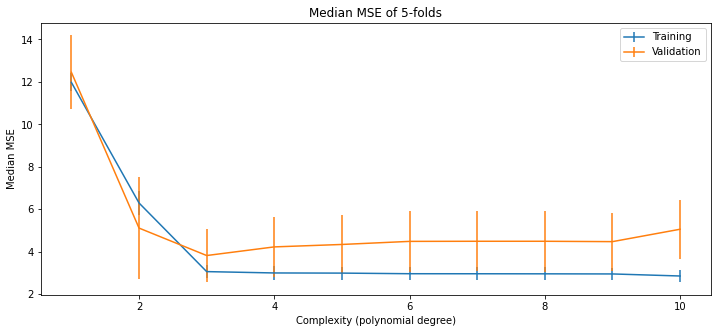

In [8]:
#Plot
plt.figure(figsize=(12,5))
plt.title(f'Median MSE of {str(folds)}-folds')
plt.errorbar(complexity,train_matrix[:,0],train_matrix[:,1],label='Training')
plt.errorbar(complexity,val_matrix[:,0],val_matrix[:,1],label='Validation')
plt.legend()
plt.xlabel('Complexity (polynomial degree)')
plt.ylabel('Median MSE')
plt.show()

As we discussed in problem 3.b, adding the cross validation fixed our curves. Now the behaviour is what we expected: the training MSE keeps getting smaller while the validation MSE grows bigger. The size of the error bars also suggest that dataset 3 was the most noisy one.

Finally, looking at the learning curve above it is highly probable that the polynomial used to generate the data had degree 3. After that, the reduction of the error is minimal and the validation MSE plateus before growing again.

## Problem 6 (extra)
### (3 points)

### Gradient descent methods

#### Generate noisy data with a quadratic feature
This is the same data as in Problem 2.

In [9]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, standard deviation=0.2)
theta_true = [0.25, 1, 0.75]
noise_std = 0.2
y = theta_true[2] * X**2 + theta_true[1] * X + theta_true[0] \
+  np.random.normal(loc=0.0, scale=noise_std, size=(m,1))

#### (a) Batch and stochastic gradient descent
Implement both batch and stochastic gradient descent and use these methods to find the best fit parameters of a quadratic model. Make sure that you also save the convergence path, i.e., how the parameters change as a function of iteration number. Concerning batch gradient descent you can use the methods that you implemented in Problem 2 with relevant modifications.
- You might want to tune the learning hyperparameter $\eta$.
- Do 50 epochs for the SGD (each epoch corresponding to using all instances of data once).
- You can start from $\theta=(0,0,0)$.
- Compare with the solution from Problem 2.

In [10]:
def design_matrix(X, degree=2):    
    X_d = np.zeros((X.shape[0],degree+1))
    for i in range(0,degree+1):
        X_d[:,i] = X[:,0]**i
    return X_d

In [11]:
# Implement BGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_bgd = np.array([0., 0., 0.]) # Note the order

def bgd_gradient_descent(X_d,
                         y,
                         theta_start=theta_bgd, 
                         eta=0.1, 
                         epochs=50):
    
    convergence = np.zeros((epochs,len(theta_start)))
    
    thetas = theta_start.copy()
    for epoch in range(epochs):
        convergence[epoch,:]=thetas
        y_hat = np.dot(X_d,thetas)
        dJ = np.dot((y[:,0]-y_hat),X_d)*2/(len(y))
        thetas += eta*dJ

    return thetas, convergence

In [12]:
theta_bgd, conv_bgd = bgd_gradient_descent(design_matrix(X),
                                           y,
                                           theta_start=theta_bgd, 
                                           eta=0.1, 
                                           epochs=50)

In [13]:
# Implement SGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_sgd = np.array([0., 0., 0.]) # Note the order

def sgd_gradient_descent(X_d,
                         y,
                         theta_start=theta_sgd, 
                         eta=0.001):
    
    convergence = np.zeros((X_d.shape[0],len(theta_start)))
    
    thetas = theta_start.copy()
    for epoch in range(X_d.shape[0]):
        convergence[epoch,:]=thetas
        y_hat = np.array([np.dot(X_d[epoch,:],thetas)])
        dJ = np.dot((y[epoch,0]-y_hat),np.array([X_d[epoch,:]]))*2
        thetas += eta*dJ

    return thetas, convergence

In [14]:
theta_sgd, conv_sgd = sgd_gradient_descent(design_matrix(X),
                                           y,
                                           theta_start=theta_sgd, 
                                           eta=0.001)

In [15]:
assert theta_bgd.shape ==(3,)
assert not (theta_bgd==0).any()
assert theta_sgd.shape ==(3,)
assert not (theta_sgd==0).any()


In [16]:
theta_bgd

array([0.40313326, 0.61277524, 0.9214194 ])

In [17]:
theta_sgd

array([0.27313714, 0.36883586, 0.56781683])

In [18]:
# From problem 2
[0.36228054, 0.72777588, 0.86621274]

[0.36228054, 0.72777588, 0.86621274]

The different values for the thetas we get fall in the same range with a fairly small difference between the methods. They also agree in the order of magnitud (and importance) of the constant, linear and quadratic components of the polynomial. This is, $\theta_0 < \theta_1 < \theta_2$ for all methods.

#### (b) Mini-batch gradient descent
Implement mini-batch gradient descent and use this method to find the best fit parameters. Details:
- use a mini-batch size of 20%
- perform 50 epochs 
- hint: the `numpy.random.permutation` function might be useful for creating the mini-batches. 
- Compare with the solutions from BGD and SGD.

In [19]:
# Implement MBGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
theta_mbgd = np.array([0., 0., 0.]) # Note the order

def mbgd_gradient_descent(X_d,
                         y,
                         theta_start=theta_bgd, 
                         eta=0.1,
                         minibatch_size=0.2,
                         epochs=50):
    
    convergence = np.zeros((epochs,len(theta_start)))
    
    thetas = theta_start.copy()
    for epoch in range(epochs):
        convergence[epoch,:]=thetas
        minibatch = np.random.choice(X_d.shape[0],round(X_d.shape[0]*minibatch_size))
        y_hat = np.dot(X_d[minibatch,:],thetas)
        dJ = np.dot((y[minibatch,0]-y_hat),X_d[minibatch,:])*2/(len(y[minibatch]))
        thetas += eta*dJ

    return thetas, convergence

In [20]:
theta_mbgd, conv_mbgd = mbgd_gradient_descent(design_matrix(X),
                                              y,
                                              theta_start=theta_mbgd, 
                                              eta=0.1,
                                              minibatch_size=0.2,
                                              epochs=50)

In [21]:
assert theta_mbgd.shape ==(3,)
assert not (theta_mbgd==0).any()


In [22]:
theta_bgd

array([0.40313326, 0.61277524, 0.9214194 ])

In [23]:
theta_sgd

array([0.27313714, 0.36883586, 0.56781683])

In [24]:
theta_mbgd

array([0.42921488, 0.63981329, 0.90448902])

As we had before, the different values for the thetas we get fall in the same range with a fairly small difference between the methods. They also agree in the order of magnitud (and importance) of the constant, linear and quadratic components of the polynomial. This is, $\theta_0 < \theta_1 < \theta_2$ for all methods.

As expected, minibatch and batch have similar results. This happens because both of them use bootstrapping to estimate the thetas, whereas stochastic gradient descent simply keeps adding corrections one datapoint at a time.

#### (c) Convergence
Compare the convergence pattern for the BGD, SGD and MGD, i.e. plot the path towards the optimal set of parameters. 
- You can start from $\theta=(0,0,0)$ with all three GD algorithms.
- Note that the path is in 3D (since there are three parameters in our quadratic model). You should plot the three different 2D projections of the path.
- Indicate also the true optimum (as found by solving the normal equation).

In [25]:
# Gotten from our previous work
normaleq=[0.36228054, 0.72777588, 0.86621274]

Text(0, 0.5, '$\\theta_2$')

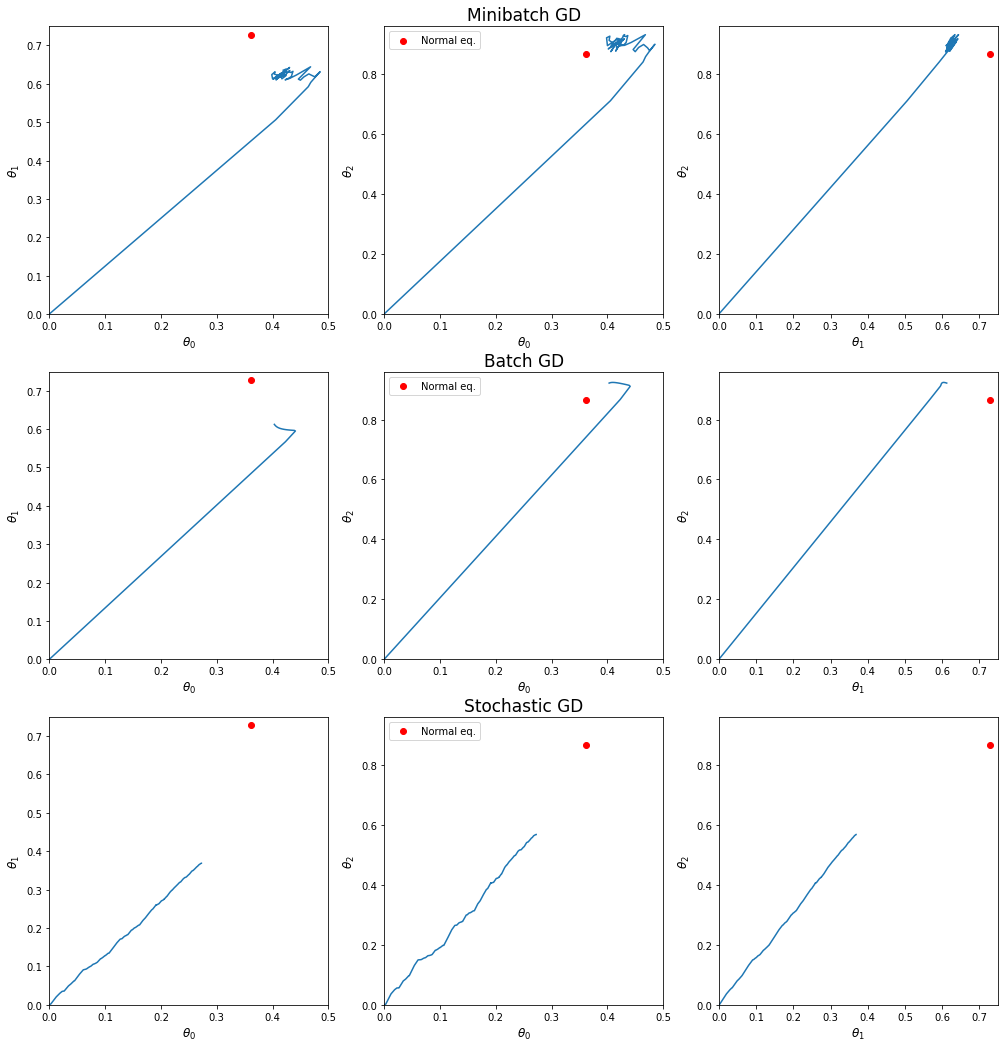

In [26]:
# Convergence plot

plt.figure(figsize=(17,18))

# Minibatch
ax = plt.subplot(3,3,1)
ax.plot(conv_mbgd[:,0],conv_mbgd[:,1])
ax.scatter(normaleq[0],normaleq[1],c='red')
ax.set_xlim(0,0.5)
ax.set_ylim(0,0.75)
ax.set_xlabel(r'$\theta_0$',fontsize=12)
ax.set_ylabel(r'$\theta_1$',fontsize=12)

ax1 = plt.subplot(3,3,2)
ax1.plot(conv_mbgd[:,0],conv_mbgd[:,2])
ax1.scatter(normaleq[0],normaleq[2],c='red', label='Normal eq.')
ax1.set_xlim(0,0.5)
ax1.set_ylim(0,0.96)
ax1.set_xlabel(r'$\theta_0$',fontsize=12)
ax1.set_ylabel(r'$\theta_2$',fontsize=12)
ax1.legend()
ax1.set_title("Minibatch GD",fontsize=17)

ax2 = plt.subplot(3,3,3)
ax2.plot(conv_mbgd[:,1],conv_mbgd[:,2])
ax2.set_xlim(0,0.75)
ax2.set_ylim(0,0.96)
ax2.scatter(normaleq[1],normaleq[2],c='red')
ax2.set_xlabel(r'$\theta_1$',fontsize=12)
ax2.set_ylabel(r'$\theta_2$',fontsize=12)

# Batch
ax3 = plt.subplot(3,3,4)
ax3.plot(conv_bgd[:,0],conv_bgd[:,1])
ax3.set_xlim(0,0.5)
ax3.set_ylim(0,0.75)
ax3.scatter(normaleq[0],normaleq[1],c='red')
ax3.set_xlabel(r'$\theta_0$',fontsize=12)
ax3.set_ylabel(r'$\theta_1$',fontsize=12)


ax4 = plt.subplot(3,3,5)
ax4.plot(conv_bgd[:,0],conv_bgd[:,2])
ax4.scatter(normaleq[0],normaleq[2],c='red', label='Normal eq.')
ax4.set_xlim(0,0.5)
ax4.set_ylim(0,0.96)
ax4.set_xlabel(r'$\theta_0$',fontsize=12)
ax4.set_ylabel(r'$\theta_2$',fontsize=12)
ax4.set_title("Batch GD",fontsize=17)
ax4.legend(loc='upper left')

ax5 = plt.subplot(3,3,6)
ax5.plot(conv_bgd[:,1],conv_bgd[:,2])
ax5.scatter(normaleq[1],normaleq[2],c='red')
ax5.set_xlim(0,0.75)
ax5.set_ylim(0,0.96)
ax5.set_xlabel(r'$\theta_1$',fontsize=12)
ax5.set_ylabel(r'$\theta_2$',fontsize=12)

# Stochastic
ax6 = plt.subplot(3,3,7)
ax6.plot(conv_sgd[:,0],conv_sgd[:,1])
ax6.set_xlim(0,0.5)
ax6.set_ylim(0,0.75)
ax6.scatter(normaleq[0],normaleq[1],c='red')
ax6.set_xlabel(r'$\theta_0$',fontsize=12)
ax6.set_ylabel(r'$\theta_1$',fontsize=12)


ax7 = plt.subplot(3,3,8)
ax7.plot(conv_sgd[:,0],conv_sgd[:,2])
ax7.scatter(normaleq[0],normaleq[2],c='red', label='Normal eq.')
ax7.set_xlim(0,0.5)
ax7.set_ylim(0,0.96)
ax7.set_xlabel(r'$\theta_0$',fontsize=12)
ax7.set_ylabel(r'$\theta_2$',fontsize=12)
ax7.set_title("Stochastic GD",fontsize=17)
ax7.legend(loc='upper left')

ax8 = plt.subplot(3,3,9)
ax8.plot(conv_sgd[:,1],conv_sgd[:,2])
ax8.scatter(normaleq[1],normaleq[2],c='red')
ax8.set_xlim(0,0.75)
ax8.set_ylim(0,0.96)
ax8.set_xlabel(r'$\theta_1$',fontsize=12)
ax8.set_ylabel(r'$\theta_2$',fontsize=12)


